# Data Analysis

## Research Question: Examine the top 3 countries who have competed at the olympics, and examine their preformance over the past 120 years.
#### For Each top 3 country, these aspects should be examined in order to answer the question:
- Which years did this country win the most medals? 
    - Most gold medals?
- Which years did this country win the least amount of medals?
- When did this country first appear in the olympics?
- How many olympics has this country competed in?
- How many athletes of that country have competed? 
    - How many each year? 
    - How many male or female athletes?
- How many athletes of that country have won medals?
    - How many won each year? 
    - How many male or female athletes have won medals?
    - How many gold, silver, bronze medals have been won by this country?
- How many athletes of this country have competed during summer olympics compared to winter olympics? 
    - How does this compare yearly?
- How many medals were won by athletes of this country during the summer olympics compared to the winter olympics? 
    - How does this compare yearly?
- What are the ages of the oldest and youngest athletes of this country to compete, and what is the average age of competing athletes of this country?
- What are the ages of the oldest and youngest athletes of this country who have won medals, and what is the average age of athletes who have won medals for this country?
- What is the average age of completing athletes per year of this country?
- What is the average age of athletes who have won medals for this country per year?
- What are the top 5 competed sports for this country?
- What are the top 5 most successful sports for this country?


Starting with some basic imports, as well as the dataset import and a simple query, we can determine what are the 3 most sucessful countries during the olympics.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(17,9)})
data = pd.read_csv('../data/raw/olympic_dataset.csv', low_memory=False, encoding = 'utf-8')
top3Countries=(data.dropna(subset=['Medal'])).value_counts(subset=['NOC'])
top3Countries.head(3)

NOC
USA    5637
URS    2503
GER    2165
dtype: int64

Based on this, we can see that the United States leads the dataset with the most amount of medals, with the Soviet Union coming in second, and Germany in third. Therefore, our data analysis will focus on these three countries.

Although, with the Soviet Union and Germany, there have been many historical changes to those two countries over the past 120 years, which could affect medal counts. So, in order to remain competitive with the United States, as well as accurate, previous and modern versions of these two countries olympic teams will be considered as well. For the Soviet Union, this means including modern Russian teams, teams that belonged to the Empire of Russia, as well as the Unified Soviet Team. For Germany, this means including the Empire of Germany, East Germany, West Germany,  and the Saar Protectorate, alongside its modern form. Now that we are considering all modern and historical versions of the countries mentioned, we can start with the analysis.

## United States(name here)

---
## Soviet Union/Russia(Aisha)

#### Analysis of Data From Russia/Soviet Union:

In [5]:
rus=(data['NOC'] == 'RUS')|(data['NOC'] == 'URS')|(data['NOC'] == 'EUN')
athletes=data[(rus)]
print("Number of events particpated in by Russian athletes: "+str(athletes.shape[0]))
athletesUnique=data[rus].drop_duplicates(subset=['Name'])
print("Number of Russian athletes who have competed at the olympics: "+str(athletesUnique.shape[0]))
maleAthletesUnique=data[rus&(data['Sex'] == 'M')].drop_duplicates(subset=['Name'])
print("Number of male Russian athletes who have competed in the olympics: "+str(maleAthletesUnique.shape[0]))
femaleAthletesUnique=data[rus&(data['Sex'] == 'F')].drop_duplicates(subset=['Name'])
print("Number of female Russian athletes who have competed in the olympics: "+str(femaleAthletesUnique.shape[0])+"\n")
medals=athletes.dropna(subset=["Medal"])
print("Number medals won by Russian athletes: "+str(medals.shape[0]))
maleAthletesMedals=data[rus&(data['Sex'] == 'M')].dropna(subset=["Medal"])
print("Number of medals won by male Russian athletes: "+str(maleAthletesMedals.shape[0]))
femaleAthletesMedals=data[rus&(data['Sex'] == 'F')].dropna(subset=["Medal"])
print("Number of medals won by female Russian athletes: "+str(femaleAthletesMedals.shape[0])+"\n")
AthletesMedalsUnique=medals.drop_duplicates(subset=['Name'])
print("Number of Russian athletes who won medals: "+str(AthletesMedalsUnique.shape[0]))
maleAthletesMedalsUnique=maleAthletesMedals.drop_duplicates(subset=['Name'])
print("Number of male Russian athletes who won medals: "+str(maleAthletesMedalsUnique.shape[0]))
femaleAthletesMedalsUnique=femaleAthletesMedals.drop_duplicates(subset=['Name'])
print("Number of female Russian athletes who won medals: "+str(femaleAthletesMedalsUnique.shape[0])+"\n")
mtype=medals.value_counts(subset=['Medal'])
print("Types of medals won by Russian athletes")
print(mtype)

Number of events particpated in by Russian athletes: 11692
Number of Russian athletes who have competed at the olympics: 5597
Number of male Russian athletes who have competed in the olympics: 3801
Number of female Russian athletes who have competed in the olympics: 1796

Number medals won by Russian athletes: 3947
Number of medals won by male Russian athletes: 2590
Number of medals won by female Russian athletes: 1357

Number of Russian athletes who won medals: 2607
Number of male Russian athletes who won medals: 1754
Number of female Russian athletes who won medals: 853

Types of medals won by Russian athletes
Medal 
Gold      1599
Bronze    1178
Silver    1170
dtype: int64


## Based on these queries, we can make some conclusions in order to answer our research question:
- How many athletes of that country have competed? 
    - How many male or female athletes?
- How many athletes of that country have won medals?
    - How many male or female athletes have won medals?
    - How many gold, silver, bronze medals have been won by this country?

#### Answers:
- 5597 Russian athletes have competed, of those, 5446 were male, and 2095 were female.
- 3947 medals were won by 2607 Russian Athletes. Of those medals, 2500 of them were won by 1754 male athletes, and 1357 of them were won by 853 female athletes. 
- Of the 3947 medals, 1599 were gold, 1170 were silver, and 1178 were bronze

#### We can also look at some more statistics to make more conlcusions:

In [6]:
top5c=athletes.value_counts(['Sport'])
print("top 5 most competed sports by Russian athletes:")
print(top5c.iloc[:5])
print("\ntop top 5 most successful sports for Russian athletes:")
top5m=medals.value_counts(['Sport'])
print(top5m.iloc[:5])
cstats=athletesUnique.groupby('Sex').agg({'Age': ['mean', 'min', 'max']})
print("\nAverage, minimum, and maximum ages of Russian athletes who have competed at the olympics:")
print(cstats)
mstats=medals.groupby('Sex').agg({'Age': ['mean', 'min', 'max']})
print("\nAverage, minimum, and maximum ages of Russian athletes who have won medals at the olympics:")
print(mstats)

top 5 most competed sports by Russian athletes:
Sport               
Athletics               1573
Gymnastics              1289
Swimming                 919
Cross Country Skiing     542
Fencing                  529
dtype: int64

top top 5 most successful sports for Russian athletes:
Sport     
Gymnastics    399
Athletics     374
Ice Hockey    233
Fencing       221
Volleyball    219
dtype: int64

Average, minimum, and maximum ages of Russian athletes who have competed at the olympics:
           Age            
          mean   min   max
Sex                       
F    23.181564  12.0  51.0
M    24.528400  16.0  52.0

Average, minimum, and maximum ages of Russian athletes who have won medals at the olympics:
           Age            
          mean   min   max
Sex                       
F    24.483419  14.0  42.0
M    25.708156  16.0  52.0


## With this information we can now answer these details of the question:
- What are the top 5 competed sports for this country?
- What are the top 5 most successful sports for this country?
 - What are the ages of the oldest and youngest athletes of this country to compete, and what   is the average age of competing athletes of this country?
- What are the ages of the oldest and youngest athletes of this country who have won medals, and what is the average age of athletes who have won medals for this country?

#### Answers:
- The top 5 competed sports by Russia/Soviet Union are athletics, gymnastics, swimming, cross country skiing, and Fencing. Which have 1573, 1289, 919, 542, and 529 athletes who have competed, respectively.
- The top 5 most successful sports for Russia are: gymnastics, athletics, ice hockey, fencing, and volleyball.
- The age of the oldest male athlete that competed is 52 and oldest female athlete is 51. The age of the youngest male athlete that competed is 16 and the youngest female is 12.
- The age of the oldest male athlete who has won a medal is 52 and oldest female is 42. The age of the youngest male althlete who has won a medal is 16 and youngest female is 14.
- The average age of the atheltes who have won medals for Russia/Soviet Union is 24 for females and 26 for males.

### Graphs showing the trends in data for Russia/Soviet Union athletes
---

Text(0.5, 1.0, 'Average age of Russian olympic athletes per year')

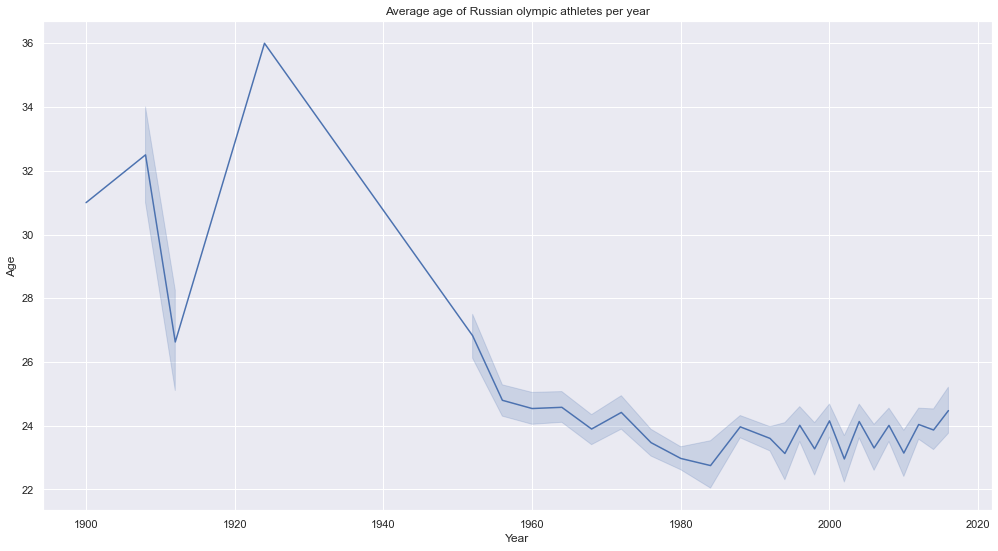

In [7]:
agePerYear=(sns.lineplot(data=athletesUnique, x="Year", y='Age'))
agePerYear.set_title("Average age of Russian olympic athletes per year")

Graph of average age of Russian Olympic athletes each year. It can be seen that right after 1920 was the peak of the oldest Russians to compete in the olympics and since then the average age has gotten younger to around 24 years old.

Text(0.5, 1.0, 'Average age of Russian medal winning athletes per year')

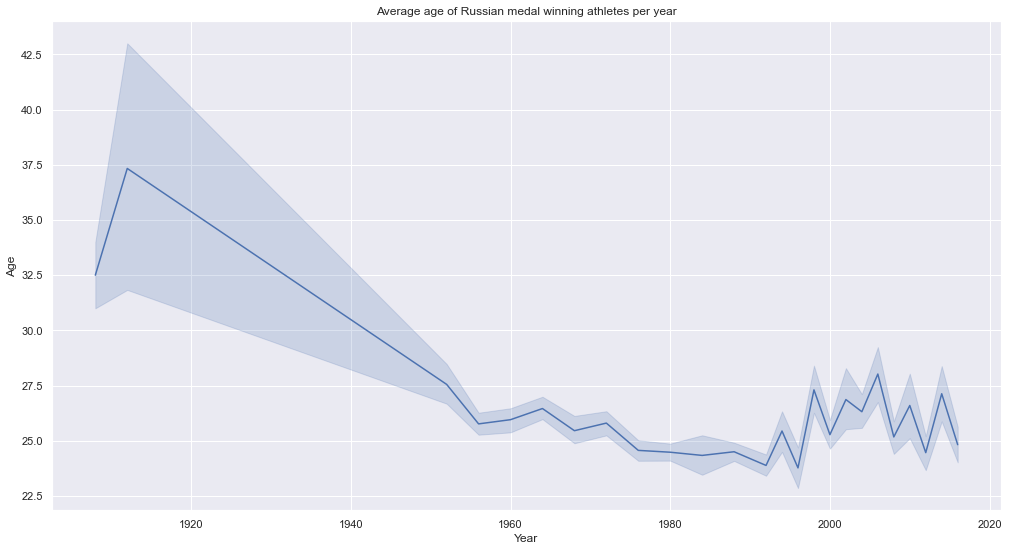

In [8]:
medalAgePerYear=(sns.lineplot(data=medals, x="Year", y='Age'))
medalAgePerYear.set_title("Average age of Russian medal winning athletes per year")

Graph of the average age of Russian athletes that won a medal each year. The trend of this graph follows somewhat the same trend as the average age of competing athletes. This shows that a wide range of ages won medals across the years since the average age for each year stayed relatively the same for number of athletes who competed and number of athletes who won a medal.

Text(0.5, 1.0, 'Medals won by Russian olympic athletes per year')

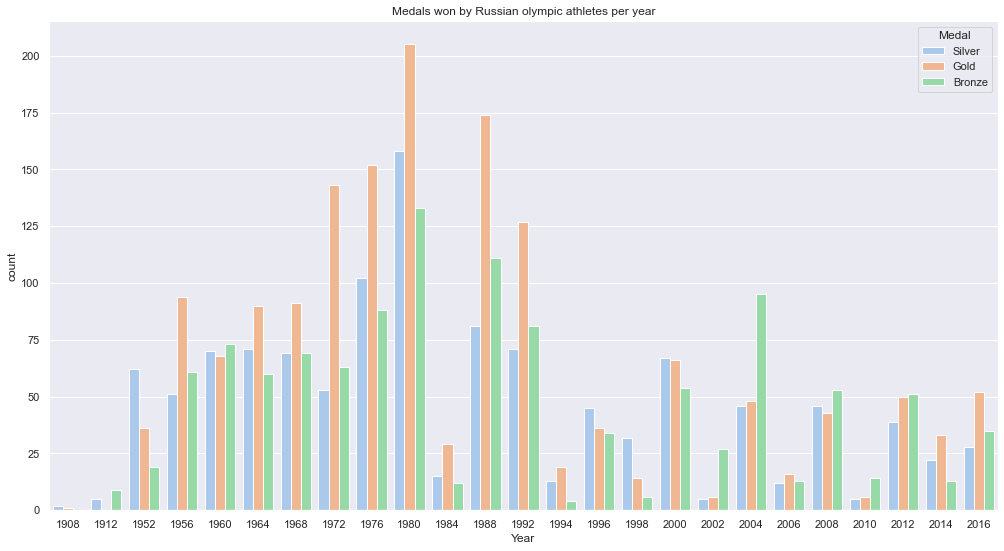

In [9]:
medalsPerYear=(sns.countplot(data=medals, x="Year", hue="Medal", palette="pastel"))
medalsPerYear.set_title("Medals won by Russian olympic athletes per year")

Graph of the number of gold, silver, and bronze medals won by Russia/Soviet Union for each year of the olympics. The graph clearly shows that 1980 had the most gold, silver, and bronze medals won.

Text(0.5, 1.0, 'Russian olympic athletes per year')

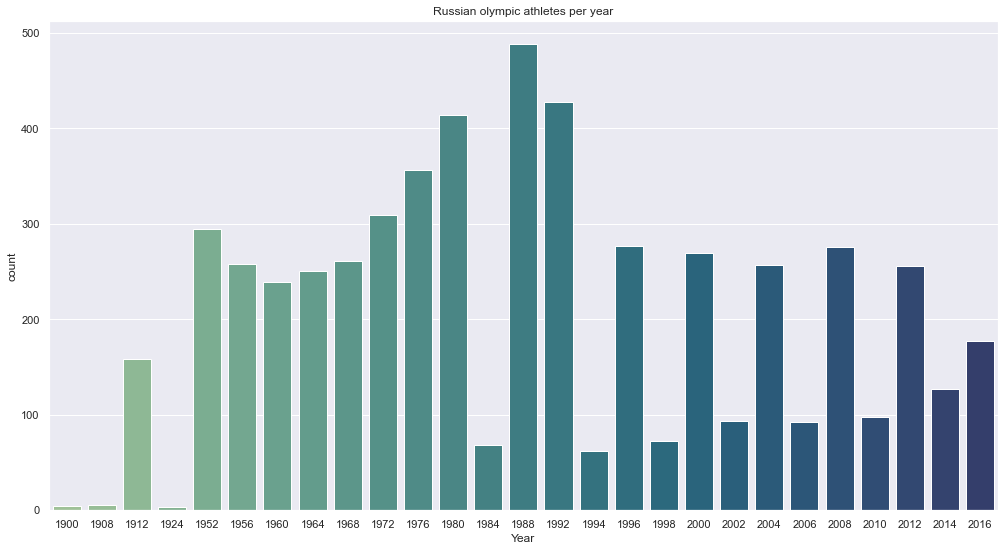

In [10]:
athletesPerYear=sns.countplot(data=athletesUnique, x="Year", palette="crest")
athletesPerYear.set_title("Russian olympic athletes per year")

Graph shows the number of athletes from Russia/Soviet Union that competed in the olympics per year. It can be concluded that 1988 had the most athletes competing. Also, we can see that the first year Russia/Soviet Union competed was 1900.

Text(0.5, 1.0, 'Russian medal winning athletes per year')

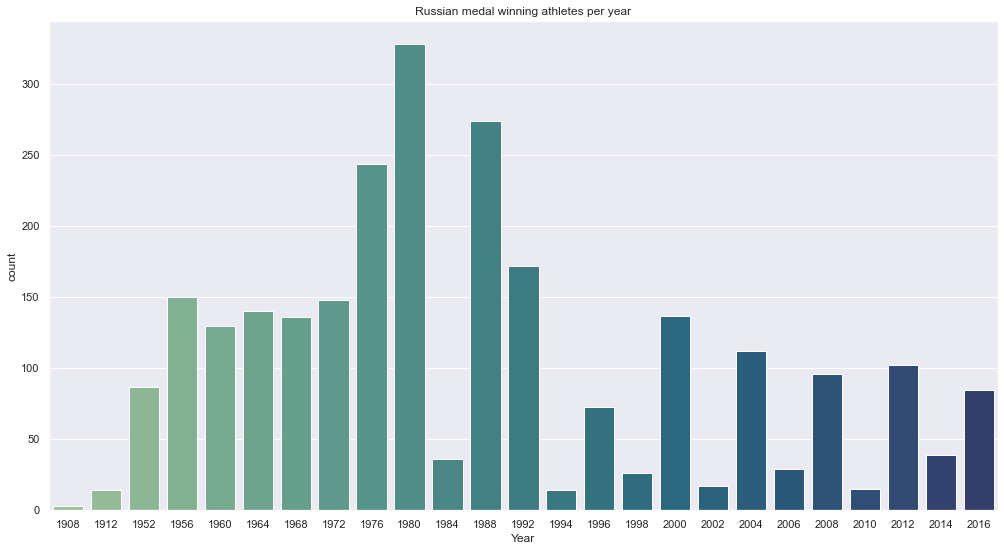

In [11]:
medalWinnersPerYear=sns.countplot(data=AthletesMedalsUnique, x="Year", palette="crest")
medalWinnersPerYear.set_title("Russian medal winning athletes per year")

Graph shows the number of athletes from Russia/Soviet Union that won a medal in the olympics per year. It can be concluded from the graph that the most medals won was in 1980.

Text(0.5, 1.0, 'Russian olympic athletes per year during summer vs winter olympics')

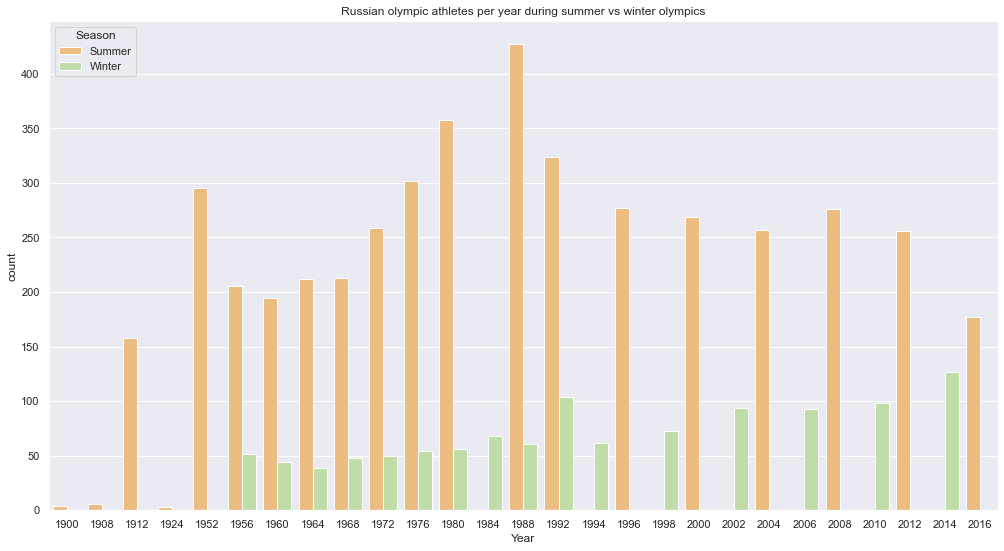

In [12]:
athletesWinterVsSummer=sns.countplot(data=athletesUnique, x="Year", hue="Season", palette="Spectral")
athletesWinterVsSummer.set_title("Russian olympic athletes per year during summer vs winter olympics")

Graph of the number of athletes from Russia/Soviet Union that competed in the summer olympics (yellow) and winter olympics (green). It can be concluded that the greatest number of athletes that competed in the summer olympics was in 1988 and the greatest number of athletes that competed in the winter olympics was in 2014.

Text(0.5, 1.0, 'Russian medal winning athletes per year during winter vs summer olympics')

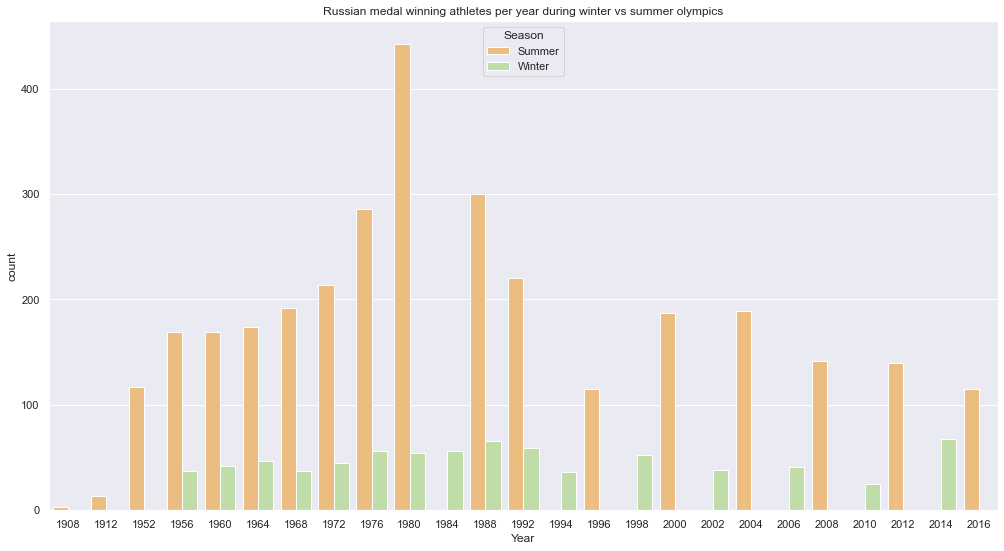

In [13]:
medalsWinterVsSummer=sns.countplot(data=medals, x="Year", hue="Season", palette="Spectral")
medalsWinterVsSummer.set_title("Russian medal winning athletes per year during winter vs summer olympics")

Graph of the number of athletes from Russia/Soviet Union that won a medal in the summer olympics (yellow) and the winter olympics (green). It can be concluded that the greatest number of athletes that won a medal in the summer olympics was in 1980 and the greatest number of athletes that won a medal in the winter olympics was in 2014.

### Additional noteworthy Graphs
---

Text(0.5, 1.0, 'Types of medals won by male and female Russian athletes')

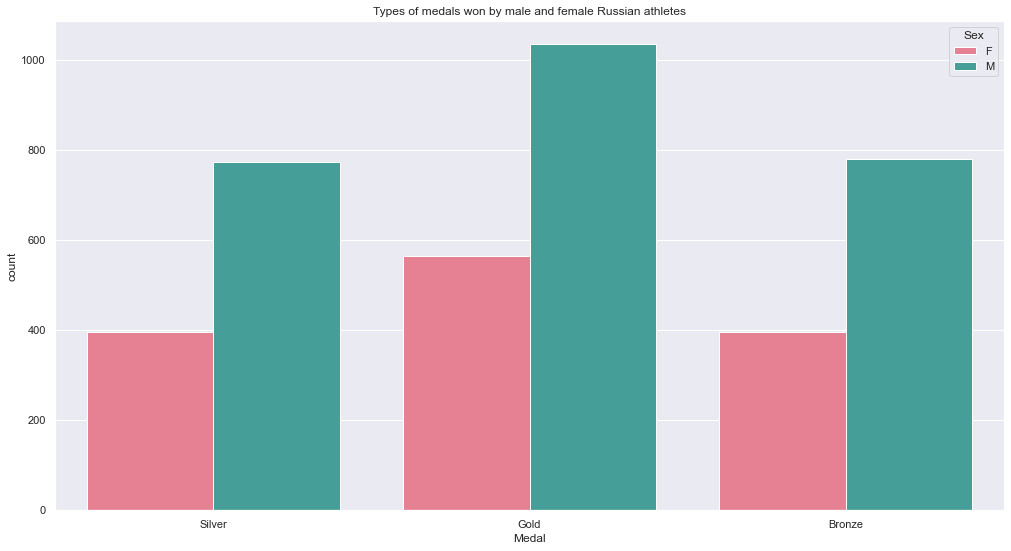

In [14]:
maleVsFemaleAthletes=(sns.countplot(data=medals, x="Medal", hue="Sex", palette="husl"))
maleVsFemaleAthletes.set_title("Types of medals won by male and female Russian athletes")

Text(0.5, 1.0, 'Medals won by Russian olympic athletes per year compared to sex')

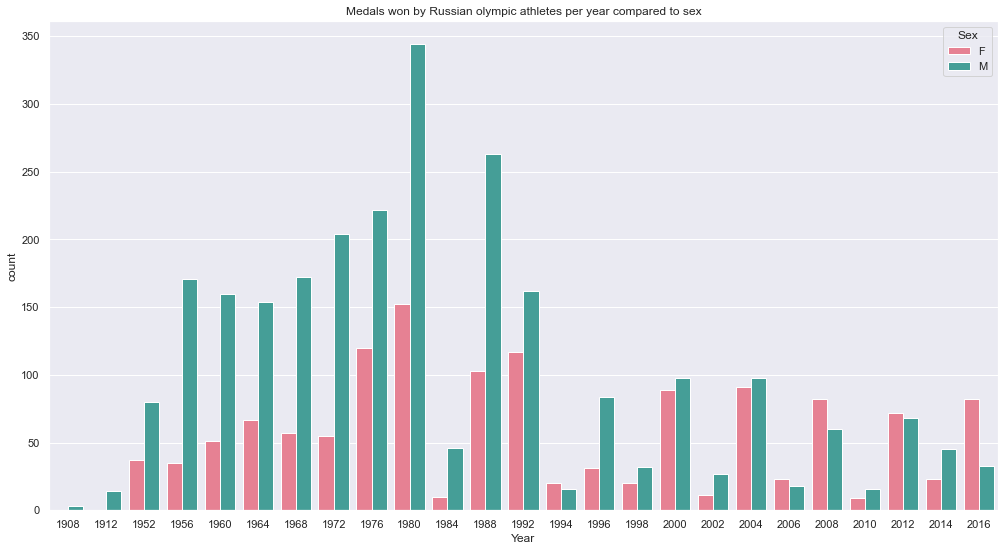

In [15]:
medalsPerYear=(sns.countplot(data=medals, x="Year", hue="Sex", palette="husl"))
medalsPerYear.set_title("Medals won by Russian olympic athletes per year compared to sex")

---

## Germany(Christian)

### General Statistics: Various pieces of information related to germanys preformance:


In [8]:
ger=(data['NOC'] == 'GER')|(data['NOC'] == 'FRG')|(data['NOC'] == 'GDR')|(data['NOC'] == 'SAA')
athletes=data[(ger)]
print("Number of events particpated in by German athletes: "+str(athletes.shape[0]))
athletesUnique=data[ger].drop_duplicates(subset=['Name'])
print("Number of German athletes who have competed at the olympics: "+str(athletesUnique.shape[0]))
maleAthletesUnique=data[ger&(data['Sex'] == 'M')].drop_duplicates(subset=['Name'])
print("Number of male German athletes who have competed in the olympics: "+str(maleAthletesUnique.shape[0]))
femaleAthletesUnique=data[ger&(data['Sex'] == 'F')].drop_duplicates(subset=['Name'])
print("Number of female German athletes who have competed in the olympics: "+str(femaleAthletesUnique.shape[0])+"\n")
medals=athletes.dropna(subset=["Medal"])
print("Number medals won by german athletes: "+str(medals.shape[0]))
maleAthletesMedals=data[ger&(data['Sex'] == 'M')].dropna(subset=["Medal"])
print("Number of medals won by male German athletes: "+str(maleAthletesMedals.shape[0]))
femaleAthletesMedals=data[ger&(data['Sex'] == 'F')].dropna(subset=["Medal"])
print("Number of medals won by female German athletes: "+str(femaleAthletesMedals.shape[0])+"\n")
AthletesMedalsUnique=medals.drop_duplicates(subset=['Name'])
print("Number of German athletes who won medals: "+str(AthletesMedalsUnique.shape[0]))
maleAthletesMedalsUnique=maleAthletesMedals.drop_duplicates(subset=['Name'])
print("Number of male German athletes who won medals: "+str(maleAthletesMedalsUnique.shape[0]))
femaleAthletesMedalsUnique=femaleAthletesMedals.drop_duplicates(subset=['Name'])
print("Number of female German athletes who won medals: "+str(femaleAthletesMedalsUnique.shape[0])+"\n")
mtype=medals.value_counts(subset=['Medal'])
print("Types of medals won by German athletes")
print(mtype)

Number of events particpated in by German athletes: 15883
Number of German athletes who have competed at the olympics: 7541
Number of male German athletes who have competed in the olympics: 5446
Number of female German athletes who have competed in the olympics: 2095

Number medals won by german athletes: 3756
Number of medals won by male German athletes: 2510
Number of medals won by female German athletes: 1246

Number of German athletes who won medals: 2563
Number of male German athletes who won medals: 1798
Number of female German athletes who won medals: 765

Types of medals won by German athletes
Medal 
Gold      1301
Bronze    1260
Silver    1195
dtype: int64


#### Based on these queries, we start to answer portions of our research question:
- How many athletes of that country have competed? 
    - How many male or female athletes?
- How many athletes of that country have won medals?
    - How many male or female athletes have won medals?
    - How many gold, silver, bronze medals have been won by this country?

#### Answers:
- 7541 German athletes have competed, of those, 5446 were male, and 2095 were female.
- 3756 medals were won by 2563 German Athletes. Of those medals, 2510 of them were won be 1798 male athletes, and 1246 of them were won by 765 female athletes. 
- Of the 3756 medals, 1301 were gold, 1195 were silver, and 1260 were bronze

### Some more advanced statistics:

In [9]:
top5c=athletes.value_counts(['Sport'])
print("top 5 most competed sports by German athletes:")
print(top5c.iloc[:5])
print("\ntop top 5 most successful sports for German athletes:")
top5m=medals.value_counts(['Sport'])
print(top5m.iloc[:5])
cstats=athletesUnique.groupby('Sex').agg({'Age': ['mean', 'min', 'max']})
print("\nAverage, minimum, and maximum ages of German athletes who have competed at the olympics:")
print(cstats)
mstats=medals.groupby('Sex').agg({'Age': ['mean', 'min', 'max']})
print("\nAverage, minimum, and maximum ages of German athletes who have won medals at the olympics:")
print(mstats)

top 5 most competed sports by German athletes:
Sport               
Athletics               2020
Gymnastics              1856
Swimming                1402
Rowing                   916
Cross Country Skiing     619
dtype: int64

top top 5 most successful sports for German athletes:
Sport    
Rowing       471
Swimming     367
Athletics    365
Hockey       248
Canoeing     229
dtype: int64

Average, minimum, and maximum ages of German athletes who have competed at the olympics:
           Age            
          mean   min   max
Sex                       
F    22.573480  12.0  55.0
M    25.457041  12.0  80.0

Average, minimum, and maximum ages of German athletes who have won medals at the olympics:
           Age            
          mean   min   max
Sex                       
F    23.894061  13.0  48.0
M    26.254340  13.0  63.0


#### With this information we can now answer these details of the question:
- What are the top 5 competed sports for this country?
- What are the top 5 most successful sports for this country?
 - What are the ages of the oldest and youngest athletes of this country to compete, and what   is the average age of competing athletes of this country?
- What are the ages of the oldest and youngest athletes of this country who have won medals, and what is the average age of athletes who have won medals for this country?

#### Answers:
- The top 5 competed sports by germany are athletics, gymnastics, swimming, rowing, and cross country skiing. Which have 2020, 1856, 1402, 916, and 619 athletes who have competed respectively. Of note, four of these sports are traditional or summer olymic sports, while one is a winter sport. 
- The top 5 successful sports for German athletes are, rowing, swimming, athletics, hockey, and canoeing, which have 471, 367, 365, 248, and 229 medal wins respectively. Of note, only hockey is a winter sport, and along with canoeing, are the only sports not in the top 5 competed sports.
- The yongest male and female german athletes to compete at the olympics were both 12 years old, while the oldest male and female german athletles to compete were 80 years old, and 55 years old respectively. The average age for male competing athletes is 25.5, while it is 22.6 for female competing female athletes.
- The yongest male and female athletes to win a medal are both 13 years old, while the oldest male and female athletes to win a medal are 63 and 48 respectively. The average age of female medal winning athletes is 23.9 years old, while the average age of male winning athletes is 26.3 years old.

### Graphs:

Text(0.5, 1.0, 'Average age of German olympic athletes per year')

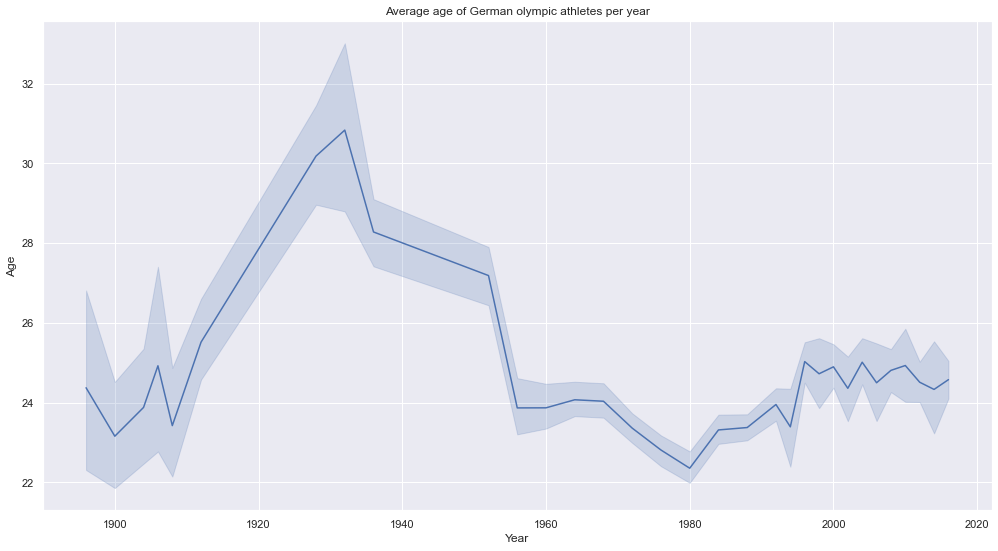

In [10]:
agePerYear=(sns.lineplot(data=athletesUnique, x="Year", y='Age'))
agePerYear.set_title("Average age of German olympic athletes per year")

Text(0.5, 1.0, 'Average age of German medal winning athletes per year')

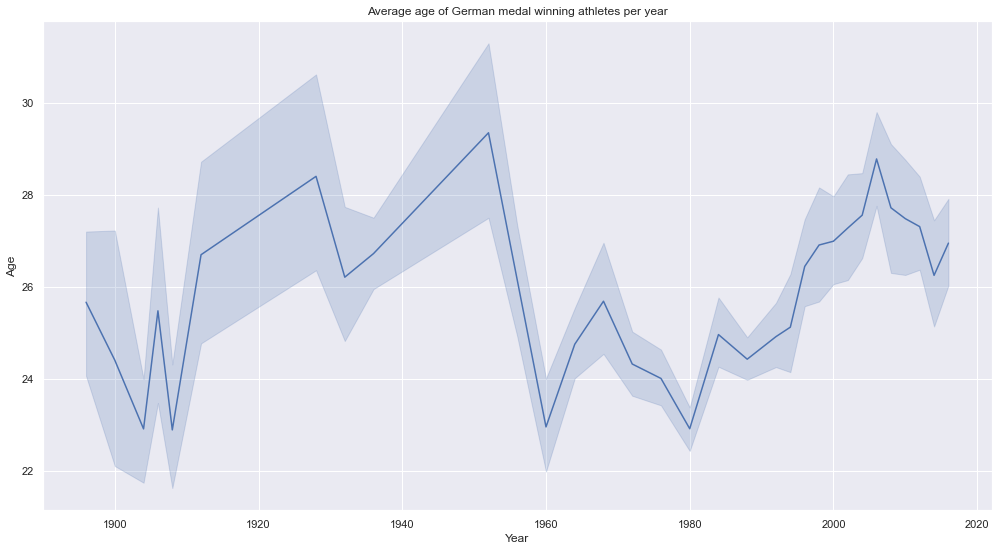

In [11]:
medalAgePerYear=(sns.lineplot(data=medals, x="Year", y='Age'))
medalAgePerYear.set_title("Average age of German medal winning athletes per year")

#### Based on these two graphs, we can answer questions related to average age of german athletes, specifically:
- What is the average age of completing athletes per year of this country?
- What is the average age of athletes who have won medals for this country per year?

#### Answers
- From examining the first graph, several things can be determined about the average age of competeing athletes. In the early 1900s-1910s, the average age was relativley low, and throughout the 20s, 30s and 40s, it increased to as high as 31, before starting to drop again over the next 30 years. It reached a low in 1980 of 23, before starting to hover around 25 during the 2000s.
- From examining the second graph, the average age is a lot more unpredictable than the first. It varys widely for the first 10 years, before starting to slowly increase twice over the 20s, 30s, 40s, and 50s, reaching a high of 28. After this high it drops dramatically to 23 in 1960, before slowly starting to increase again. It drops again to 23 in 1980, before reaching a high of 27 in the 2000s. Over the past 2 olympics, the average has dropped again. 
- Interestingly, the average for medal winning athletes is consisently higher than competing athletes.

Text(0.5, 1.0, 'Medals won by German olympic athletes per year')

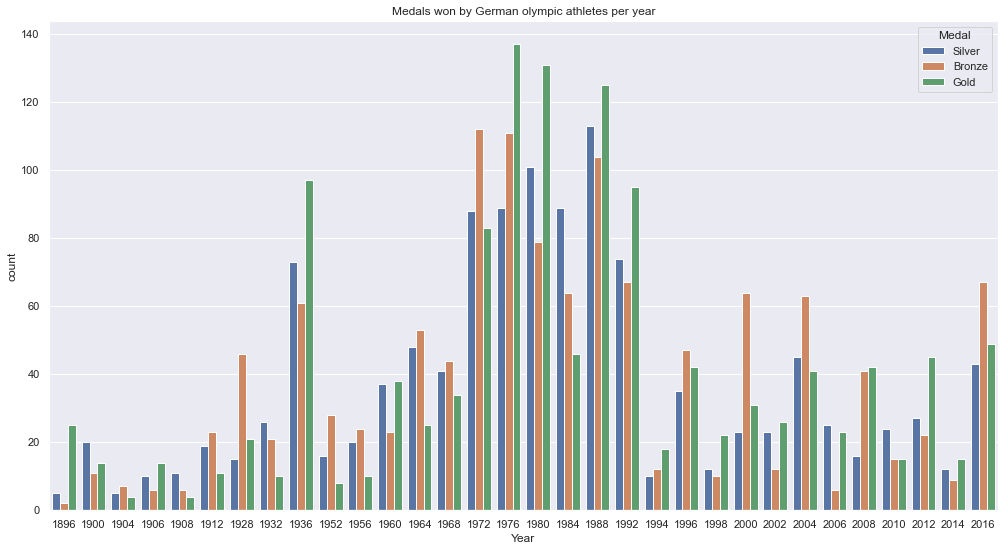

In [12]:
medalsPerYear=(sns.countplot(data=medals, x="Year", hue="Medal"))
medalsPerYear.set_title("Medals won by German olympic athletes per year")

Text(0.5, 1.0, 'German olympic athletes per year')

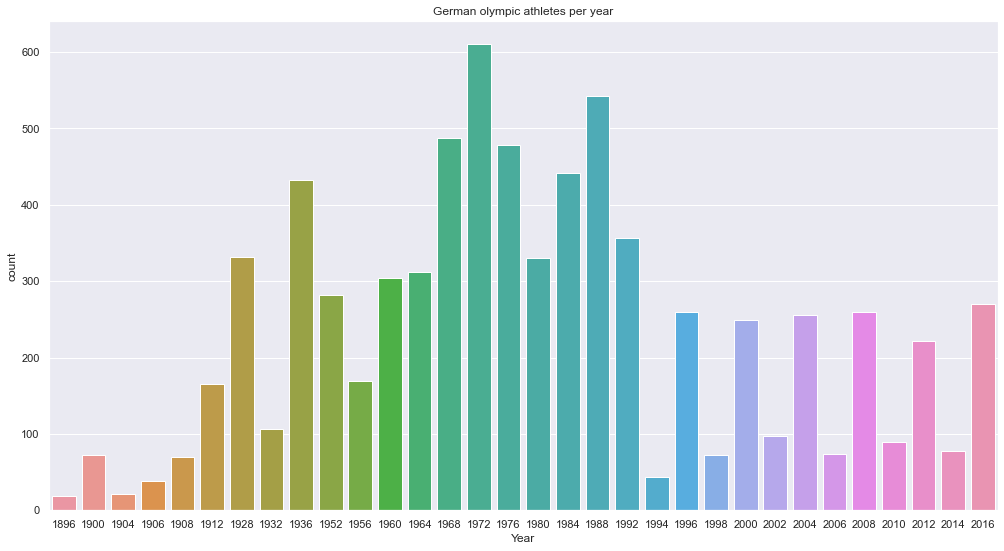

In [13]:
athletesPerYear=sns.countplot(data=athletesUnique, x="Year")
athletesPerYear.set_title("German olympic athletes per year")

Text(0.5, 1.0, 'German medal winning athletes per year')

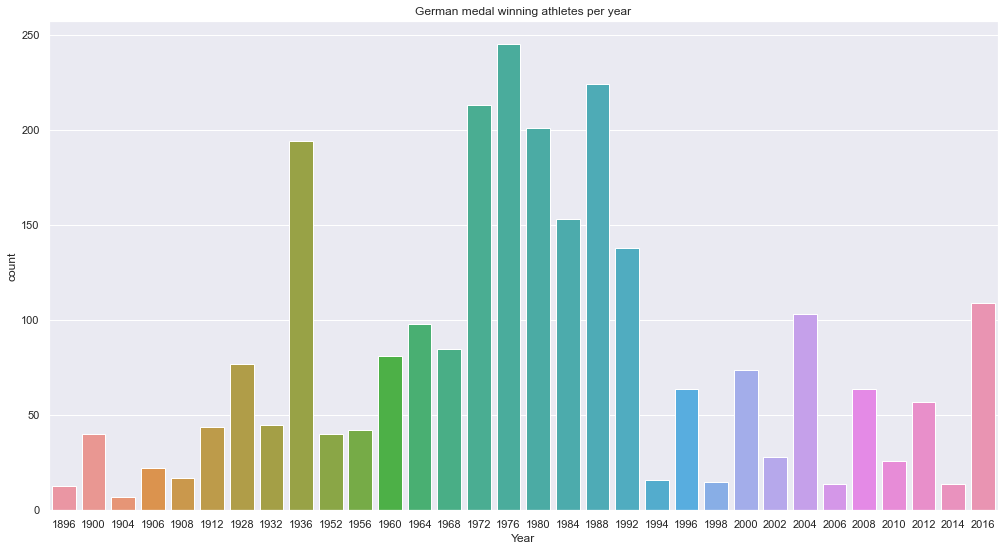

In [14]:
medalWinnersPerYear=sns.countplot(data=AthletesMedalsUnique, x="Year")
medalWinnersPerYear.set_title("German medal winning athletes per year")

#### Based on these three graphs, we can answer questions related to medals and medal counts:
- Which years did this country win the most medals?
    - Most gold medals?
- Which years did this country win the least amount of medals?
- When did this country first appear in the olympics?
- How many olympics has this country competed in?
- How many athletes of that country have competed?
    - How many each year?
- How many athletes of that country have won medals?
    - How many won each year?

#### Answers:
- Based on the first graph:
    - Germany won the most amount of medals in 1988, and they won the most amount of gold medals in 1972.
    - The year that Germany won the least amount of medals was 1904.
    - Germany first participated in the olympics in 1896, and has participated in 46 different olympics.
- Based on the second graph, athlete participation can be seen over time. For the first 10 years of the olympics, there were not that many german athletes, but numbers increased significantly during the 1912, 1928, and 1936 olympics. During the 50s participation declined again, most likley due the aftermath of World War 2, but it increased again during the 60s and 70s. It reached its peak in 1972, most likely due to both East and West Germany both competing. After this, participation declined slowly, reaching a modern day average, which is affected by the start of summer and winter olympics alternating in 1994.
- Based on the third graph, German medal winners can be measured over time. The gaph itself follow a very similar pattern to the participation graph, which makes sense. Considering more athletes would result in more medals.There are several significant data points though. One in 1936, where the olympics where hosted in berlin, and two in 2004 and 2016, where medals were won at a much higher rate than previous and future years. As with the previous graph, there is a peak during the 60s to 90s, which is due to Germany essentially having 2 seperate olympic teams, one for each half of the split country.

Text(0.5, 1.0, 'German olympic athletes per year during summer vs winter olympics')

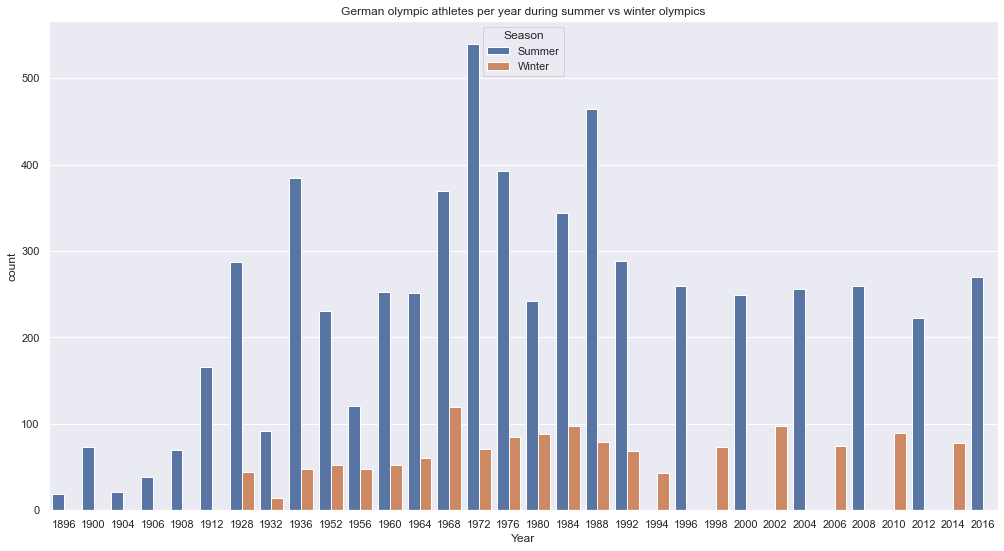

In [15]:
athletesWinterVsSummer=sns.countplot(data=athletesUnique, x="Year", hue="Season")
athletesWinterVsSummer.set_title("German olympic athletes per year during summer vs winter olympics")

Text(0.5, 1.0, 'German medal winning athletes per year during winter vs summer olympics')

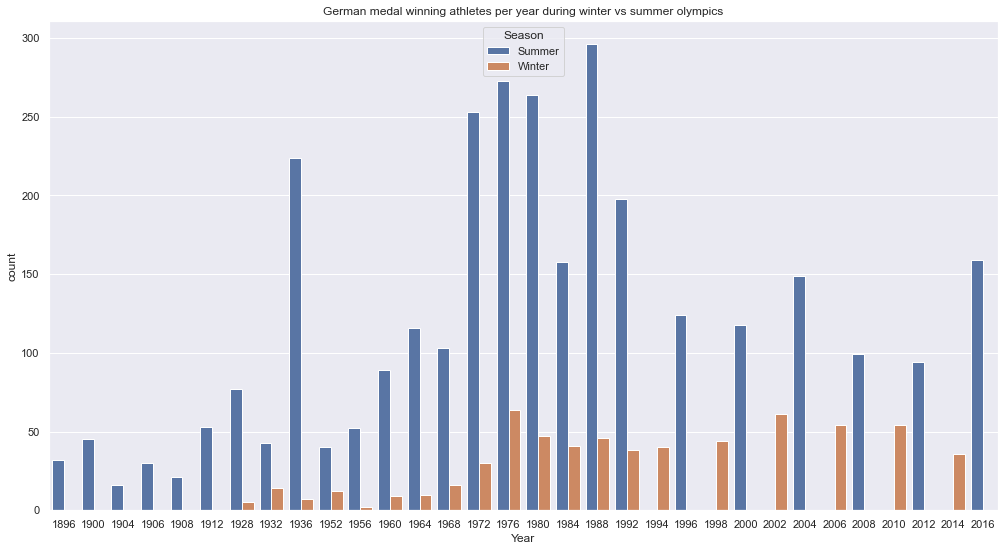

In [16]:
medalsWinterVsSummer=sns.countplot(data=medals, x="Year", hue="Season")
medalsWinterVsSummer.set_title("German medal winning athletes per year during winter vs summer olympics")

#### Based on these two graphs, preformance during the summer and winter olympics can be determined, as well as the questions relating to them:
- How many athletes of this country have competed during summer olympics compared to winter olympics?
    - How does this compare yearly?
- How many medals were won by athletes of this country during the summer olympics compared to the winter olympics?
    - How does this compare yearly?
    
#### Answers:

- In both of these graphs, it can be seen that the summer olympics are much prefered by germany, compared to the winter olympics. Both medal counts and athlete participation are higher during the summer.
- In terms of actual numbers of medals and athletes, results are very similar yearly to graphs that have already been covered.

### Additional noteworthy graphs:

Text(0.5, 1.0, 'Types of medals won by male and female German athletes')

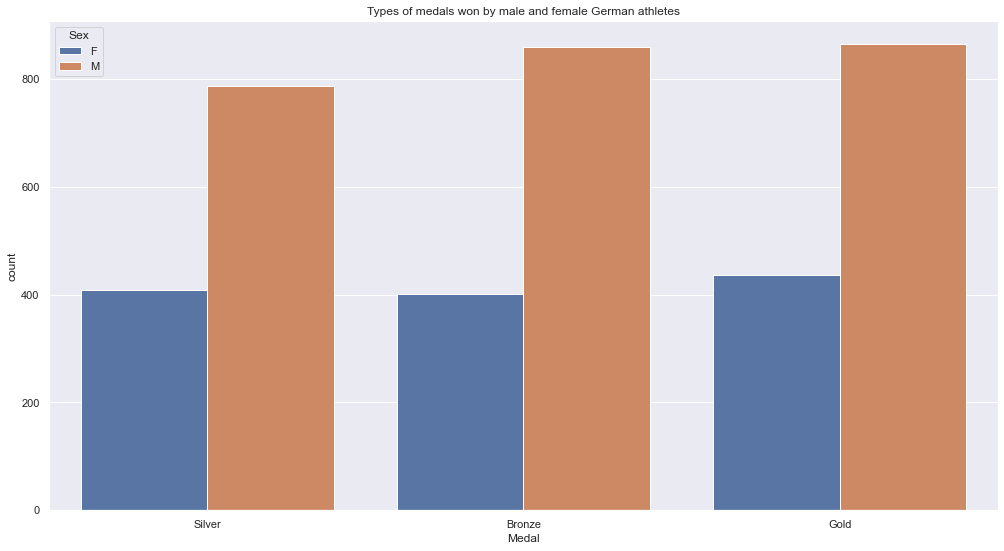

In [17]:
maleVsFemaleAthletes=(sns.countplot(data=medals, x="Medal", hue="Sex"))
maleVsFemaleAthletes.set_title("Types of medals won by male and female German athletes")

Text(0.5, 1.0, 'Medals won by German olympic athletes per year compared to sex')

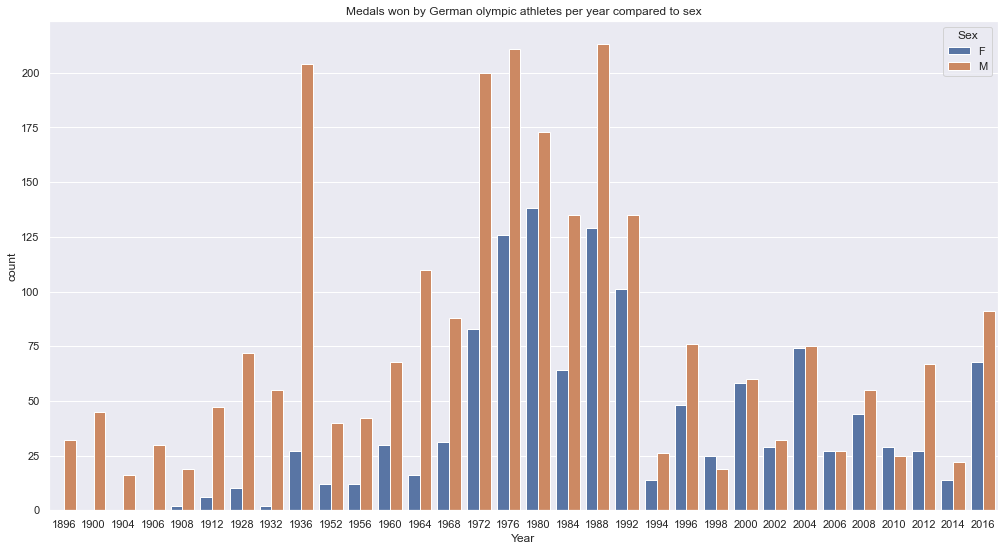

In [18]:
medalsPerYear=(sns.countplot(data=medals, x="Year", hue="Sex"))
medalsPerYear.set_title("Medals won by German olympic athletes per year compared to sex")